This notebook munges the accuracy and $F_1$ values for the subtype classification task and makes several visualizations.

In [1]:
import getpass
import sys
import time

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 200

In [4]:
print(getpass.getuser())

ddomingofernandez


In [5]:
print(sys.version)

3.6.5 (default, Apr 20 2018, 08:54:42) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-16)]


In [6]:
print(time.asctime())

Thu May  9 17:10:06 2019


In [7]:
df = pd.read_csv('../../input/subtype_classification_results.tsv', sep='\t')
df = df.sort_values(['Database', 'Dataset'])
df.head()

,Database,Dataset,Metric,Measurement
0,KEGG,BRCA,Accuracy,0.876190
1,KEGG,BRCA,Accuracy,0.914286
2,KEGG,BRCA,Accuracy,0.904762
3,KEGG,BRCA,Accuracy,0.895238
4,KEGG,BRCA,Accuracy,0.847619


In [8]:
accuracy_df = df[df.Metric == 'Accuracy']
del accuracy_df['Metric']
accuracy_df.columns = ['Database', 'Dataset', 'Accuracy']

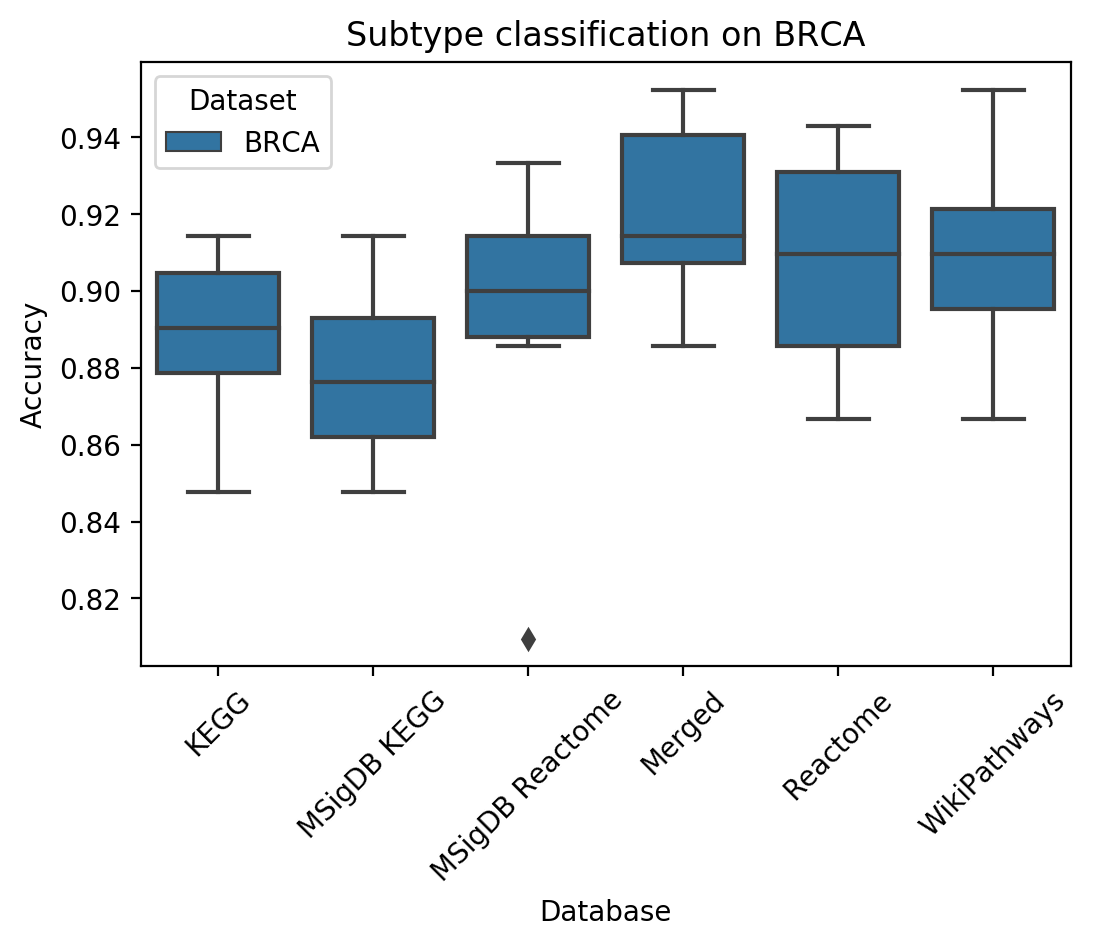

In [9]:
ax = sns.boxplot(
    y='Accuracy',
    x='Database',
    hue='Dataset',
    data=accuracy_df,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Subtype classification on BRCA')
plt.show()

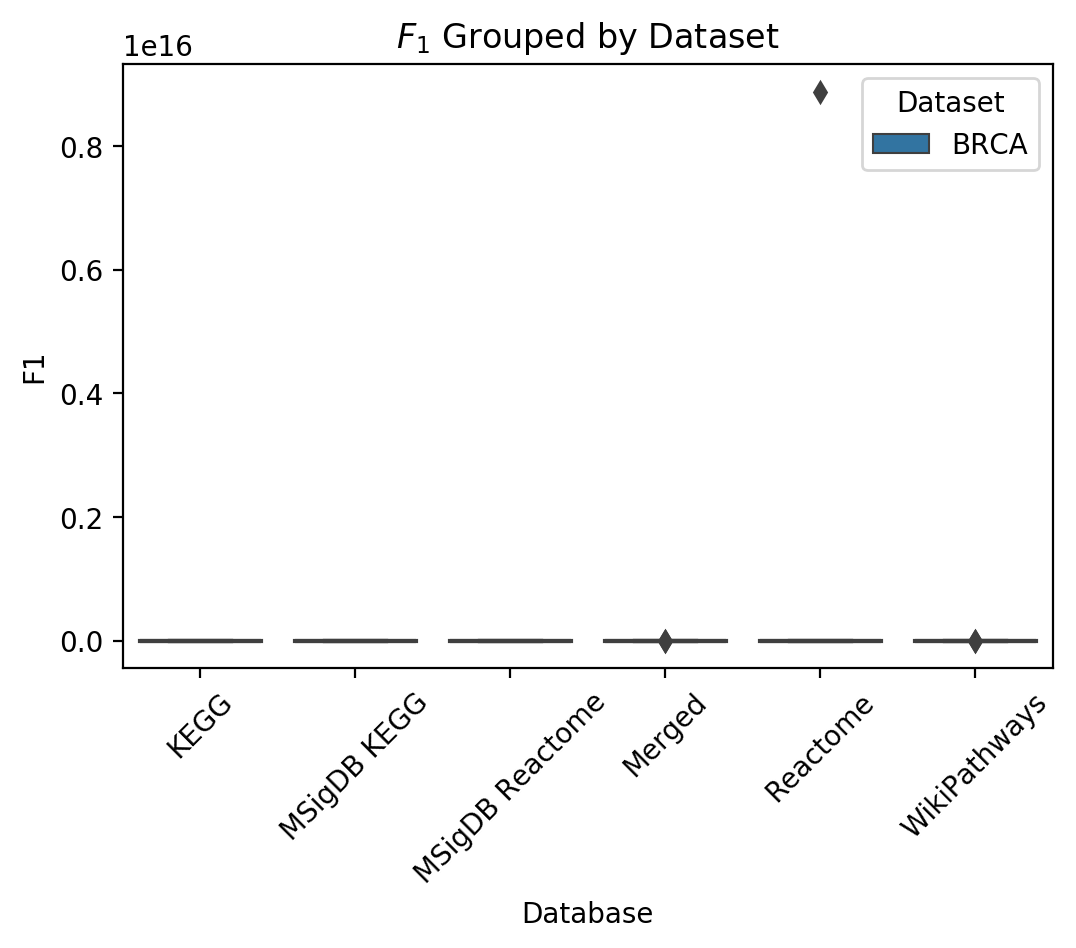

In [10]:
f1_df = df[df.Metric == 'F1']
del f1_df['Metric']
f1_df.columns = ['Database', 'Dataset', 'F1']

ax = sns.boxplot(
    y='F1',
    x='Database',
    hue='Dataset',
    data=f1_df
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('$F_1$ Grouped by Dataset')
plt.show()